<a href="https://colab.research.google.com/github/gonulsinem/Deep-Learning---Derin-Ogrenme/blob/main/1_CIFAR_10_Dataset_CNN_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#kutuphaneler import edildi.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from keras import layers, models, losses
from keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras

In [2]:
#dataset yuklendi
(train_images, train_labels), (test_images, test_labels) = keras.datasets.cifar10.load_data()

170508288/170498071 [==============================] - 12s 0us/step


In [3]:
print('Train images shape:', train_images.shape)
print('Test images shape:', test_images.shape)

Train images shape: (50000, 32, 32, 3)
Test images shape: (10000, 32, 32, 3)


In [4]:
print('Train labels:\n', (pd.DataFrame(train_labels)).value_counts())

Train labels:
 9    5000
8    5000
7    5000
6    5000
5    5000
4    5000
3    5000
2    5000
1    5000
0    5000
dtype: int64


In [5]:
class_names=["airplane","automobile","bird","cat",
"deer","dog","frog","horse","ship","truck"]
#class isimleri belirlendi


[9]


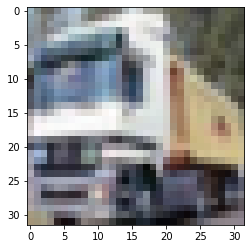

In [6]:
plt.imshow(train_images[1])
print(train_labels[1])

In [7]:
train_images, test_images = train_images/255, test_images/255 #normalize edildi

In [8]:
model = models.Sequential()
#model olusturuldu

In [9]:
## CNN Layer
model.add(layers.Conv2D(32,(3,3), activation='relu', input_shape=(32,32,3)))
model.add(layers.MaxPooling2D())
model.add(layers.Conv2D(64,(3,3), activation='relu'))
model.add(layers.MaxPooling2D())
model.add(layers.Conv2D(64,(3,3), activation='relu'))

In [10]:
#Dense Layers
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [11]:
#model compile edildi
model.compile(optimizer='adam',
              loss = losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [12]:
#model ozeti
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                6

In [13]:
# data augmentation - veri arrtirma
datagen = ImageDataGenerator(
    rotation_range = 40,
    width_shift_range= 0.2,
    height_shift_range = 0,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode='nearest'
)

In [14]:
# modelin egitimi
model.fit(datagen.flow(train_images,train_labels),
          batch_size = 32,
          steps_per_epoch = len(train_images)/32,
          epochs=25,
          verbose=1)

Epoch 1/25
1562/1562 [==============================] - 68s 24ms/step - loss: 1.7093 - accuracy: 0.1168
Epoch 2/25
1562/1562 [==============================] - 38s 24ms/step - loss: 1.4583 - accuracy: 0.1016
Epoch 3/25
1562/1562 [==============================] - 38s 24ms/step - loss: 1.3501 - accuracy: 0.0983
Epoch 4/25
1562/1562 [==============================] - 38s 25ms/step - loss: 1.2914 - accuracy: 0.0998
Epoch 5/25
1562/1562 [==============================] - 38s 24ms/step - loss: 1.2345 - accuracy: 0.1010
Epoch 6/25
1562/1562 [==============================] - 38s 24ms/step - loss: 1.1972 - accuracy: 0.1007
Epoch 7/25
1562/1562 [==============================] - 38s 24ms/step - loss: 1.1593 - accuracy: 0.0995
Epoch 8/25
1562/1562 [==============================] - 39s 25ms/step - loss: 1.1313 - accuracy: 0.1005
Epoch 9/25
1562/1562 [==============================] - 38s 24ms/step - loss: 1.1108 - accuracy: 0.1000
Epoch 10/25
1562/1562 [==============================] - 38s 25m

In [15]:
loss = model.evaluate(datagen.flow(test_images,test_labels), batch_size=32)

313/313 [==============================] - 7s 23ms/step - loss: 1.0197 - accuracy: 0.1099


In [16]:
y_pred = model.predict(test_images)

Tahmin etmek istediginiz goruntunun indeksi..: 14
Real Value: truck - Predicted Value: truck


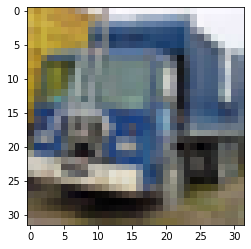

In [17]:
list_num=""
while list_num.isdigit() == False:
  list_num = input("Tahmin etmek istediginiz goruntunun indeksi..: ")
  if int(list_num)>=len(test_images):
    list_num=""
list_num = int(list_num)
predicted_value=class_names[np.argmax(y_pred[list_num])]
actual_value= class_names[test_labels[list_num][0]]
print(f"Real Value: {actual_value} - Predicted Value: {predicted_value}")
plt.figure()
plt.imshow(test_images[list_num])

Tahmin etmek istediginiz goruntunun indeksi..: 30
Real Value: frog - Predicted Value: frog


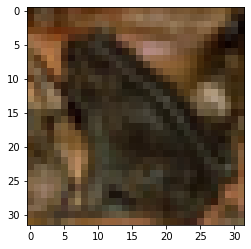

In [18]:
list_num=""
while list_num.isdigit() == False:
  list_num = input("Tahmin etmek istediginiz goruntunun indeksi..: ")
  if int(list_num)>=len(test_images):
    list_num=""
list_num = int(list_num)
predicted_value=class_names[np.argmax(y_pred[list_num])]
actual_value= class_names[test_labels[list_num][0]]
print(f"Real Value: {actual_value} - Predicted Value: {predicted_value}")
plt.figure()
plt.imshow(test_images[list_num])